# Multiple Linear Regression.

## Import required packages.

In [42]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.formula.api as sm

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

import matplotlib.pylab as plt
%matplotlib inline

## Upload data set for analysis. Explore, clean, and pre-process data. 

In [43]:
# Create data frame from the original data set.  
car_df = pd.read_csv('Tesla_Inventory.csv')

# Determine dimensions of dataframe. 
car_df.shape # It has 75 rows and 10 columns.


(75, 10)

In [44]:
# Display the first 5 records of the data set.
car_df.head()


,price,colour,car_type,year,trim,mileage,wheels,Interior_Color,Interior_Type,location
0,47000,Black,Model_S,2018,75D_All-Wheel_Drive,56752,19,Black,Textile,"Lathrop,_CA"
1,52100,Silver,Model_S,2019,75D_All-Wheel_Drive,26360,19,Black,Premium,"Lathrop,_CA"
2,59800,Black,Model_S,2018,100D_Long_Range_All-Wheel_Drive,31803,19,Black,Premium,"Lathrop,_CA"
3,62100,Silver,Model_S,2019,100D_Long_Range_All-Wheel_Drive,24562,19,Black,Premium,"Lathrop,_CA"
4,66100,Silver,Model_S,2019,Long_Range_All-Wheel_Drive,23213,19,Black-White,Premium,"Lathrop,_CA"


In [45]:
# Display the column names.
car_df.columns

Index(['price', 'colour', 'car_type', 'year', 'trim', 'mileage', 'wheels',
       'Interior_Color', 'Interior_Type', 'location'],
      dtype='object')

In [46]:
# Create a subset data frame with required columns and top 
# round 50 records from 75 records for regression analysis.

# Use the pd.concat() function to combine non-consecutive 
# columns into a new data frame, car_df_reg, with top 50
# records.
# The axis argument specifies the dimension along which 
# the concatenation happens, 0=rows, 1=columns.
car_df_reg  = pd.concat([car_df.iloc[0:50,0:4], 
           car_df.iloc[0:50,5:7], car_df.iloc[0:50,8:9]], axis=1)

# Show the first 10 records of dataframe for regression analysis.
car_df_reg.head(20)


,price,colour,car_type,year,mileage,wheels,Interior_Type
0,47000,Black,Model_S,2018,56752,19,Textile
1,52100,Silver,Model_S,2019,26360,19,Premium
2,59800,Black,Model_S,2018,31803,19,Premium
3,62100,Silver,Model_S,2019,24562,19,Premium
4,66100,Silver,Model_S,2019,23213,19,Premium
5,66400,Pearl,Model_S,2020,27917,19,Premium
6,68500,Silver,Model_S,2020,7879,19,Premium
7,73700,Silver,Model_S,2020,26178,19,Premium
8,75000,Silver,Model_S,2020,19855,21,Premium
9,75400,Blue,Model_S,2020,16320,19,Premium


In [47]:
# Display column data types in the dataframe for regression analysis.
car_df_reg.dtypes

price             int64
colour           object
car_type         object
year              int64
mileage           int64
wheels            int64
Interior_Type    object
dtype: object

In [48]:
# Change all object variable to 'category'. 
car_df_reg.colour = car_df_reg.colour.astype('category')
car_df_reg.car_type = car_df_reg.car_type.astype('category')
#car_df_reg.Interior_Color = car_df_reg.Interior_Color.astype('category')
car_df_reg.Interior_Type = car_df_reg.Interior_Type.astype('category')
car_df_reg.wheels = car_df_reg.wheels.astype('category')
# Display category classes and category type.

print(' ')
print('Category levels and changed variable type:')
print(car_df_reg.colour.cat.categories)  
print(car_df_reg.colour.dtype)  

print(car_df_reg.car_type.cat.categories)  
print(car_df_reg.car_type.dtype)  


#print(car_df_reg.Interior_Color.cat.categories) 
#print(car_df_reg.Interior_Color.dtype) 

print(car_df_reg.Interior_Type.cat.categories) 
print(car_df_reg.Interior_Type.dtype) 

print(car_df_reg.wheels.cat.categories) 
print(car_df_reg.wheels.dtype) 

 
Category levels and changed variable type:
Index(['Black', 'Blue', 'Pearl', 'Red', 'Silver'], dtype='object')
category
Index(['Model_3', 'Model_S', 'Model_X', 'Model_Y'], dtype='object')
category
Index(['Partial Premium', 'Premium', 'Textile'], dtype='object')
category
Int64Index([18, 19, 20, 21, 22], dtype='int64')
category


In [49]:
# Convert category variable 'Fuel' into dummy variables, 
# Use drop_first=True to drop the first dummy variable, CNG.
car_df_reg = pd.get_dummies(car_df_reg, prefix_sep='_', 
                            drop_first=True)
car_df_reg.columns


Index(['price', 'year', 'mileage', 'colour_Blue', 'colour_Pearl', 'colour_Red',
       'colour_Silver', 'car_type_Model_S', 'car_type_Model_X',
       'car_type_Model_Y', 'wheels_19', 'wheels_20', 'wheels_21', 'wheels_22',
       'Interior_Type_Premium', 'Interior_Type_Textile'],
      dtype='object')

In [50]:
# Display column data types in the dataframe for regression analysis.
car_df_reg.dtypes

price                    int64
year                     int64
mileage                  int64
colour_Blue              uint8
colour_Pearl             uint8
colour_Red               uint8
colour_Silver            uint8
car_type_Model_S         uint8
car_type_Model_X         uint8
car_type_Model_Y         uint8
wheels_19                uint8
wheels_20                uint8
wheels_21                uint8
wheels_22                uint8
Interior_Type_Premium    uint8
Interior_Type_Textile    uint8
dtype: object

## Develop multiple linear regression model and make predictions. 

In [53]:
# Identify predictors and outcome of the regression model.
predictors = [ 'year',
               'mileage',
                'colour_Blue',
                'colour_Pearl',
                'colour_Red',
                'colour_Silver',
                'car_type_Model_S',
                'car_type_Model_X',
                'car_type_Model_Y',
                #'Interior_Color_Black-White',
                #'Interior_Color_Cream',
                'wheels_19',            
                'wheels_20',               
                'wheels_21',              
                'wheels_22',              
                'Interior_Type_Premium',
                'Interior_Type_Textile' ]

outcome =       'price'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors]
y = car_df_reg[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y
# and LinearRegression() function from sklearn (skikit-learn) 
# library.
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

# Display intercept and regression coefficients. Round
# them to 2 decimals.
print('Regression Model for Tesla TradeIn Training Set')
print()
print('Intercept: ', np.round(car_lm.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns, 'Coefficient': np.round(car_lm.coef_, 2)}))


Regression Model for Tesla TradeIn Training Set

Intercept:  -10777830.64
                Predictor  Coefficient
0                    year      5355.91
1                 mileage        -0.21
2             colour_Blue      5564.77
3            colour_Pearl      1913.88
4              colour_Red      4596.87
5           colour_Silver       768.06
6        car_type_Model_S     14518.56
7        car_type_Model_X     22356.93
8        car_type_Model_Y     -9262.19
9               wheels_19      6112.23
10              wheels_20      1469.30
11              wheels_21     14330.52
12              wheels_22      5701.25
13  Interior_Type_Premium     10822.96
14  Interior_Type_Textile      9497.72


In [58]:
# Use predict() to score (make) predictions for validation set.
car_lm_pred = car_lm.predict(valid_X)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
print('Actual, Prediction, and Residual Prices for Validation Set')
result = round(pd.DataFrame({'Actual': valid_y,'Predicted': car_lm_pred, 
                       'Residual': valid_y - car_lm_pred}), 2)
print(result.head(10))

Actual, Prediction, and Residual Prices for Validation Set
    Actual  Predicted  Residual
27   67600   71711.79  -4111.79
35   34000   37433.46  -3433.46
40   35300   37071.77  -1771.77
38   34500   33964.83    535.17
2    59800   55048.14   4751.86
3    62100   62720.30   -620.30
48   36500   37382.07   -882.07
29   31300   23095.84   8204.16
46   36100   45290.37  -9190.37
31   31500   28773.55   2726.45


## Identify and compare performance measures for training and validation set.

In [59]:
# Use predict() function to make predictions for
# training set.
pred_y = car_lm.predict(train_X)

# Create prediction performance measures for training set.
r2 = round(r2_score(train_y, pred_y),3)
adj_r2 = round(adjusted_r2_score(train_y, pred_y, car_lm),3)
aic = round(AIC_score(train_y, pred_y, car_lm),2)
bic = round(BIC_score(train_y, pred_y, car_lm),2)

# Display prediction performance measures for training set.
print('Prediction Performance Measures for Training Set')
print('r2 : ', r2)
print('Adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)
print() 

# Create prediction performance measures for validation set.
r2 = round(r2_score(valid_y, car_lm_pred),3)
adj_r2 = round(adjusted_r2_score(valid_y, car_lm_pred, car_lm),3)
aic = round(AIC_score(valid_y, car_lm_pred, car_lm),2)
bic = round(BIC_score(valid_y, car_lm_pred, car_lm),2)

# Display prediction performance measures for validation set.
print('Prediction Performance Measures for Validation Set')
print('r2 : ', r2)
print('adjusted r2 : ', adj_r2)
print('AIC : ', aic)
print('BIC : ', bic)

Prediction Performance Measures for Training Set
r2 :  0.961
Adjusted r2 :  0.918
AIC :  603.91
BIC :  627.73

Prediction Performance Measures for Validation Set
r2 :  0.858
adjusted r2 :  0.325
AIC :  429.28
BIC :  446.2


In [60]:
# Display common accuracy measures for training set.
print('Accuracy Measures for Training Set - All Variables')
regressionSummary(train_y, pred_y)
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set - All Variables')
regressionSummary(valid_y, car_lm_pred)

Accuracy Measures for Training Set - All Variables

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 3227.9416
            Mean Absolute Error (MAE) : 2353.1037
          Mean Percentage Error (MPE) : -0.2501
Mean Absolute Percentage Error (MAPE) : 4.7805

Accuracy Measures for Validation Set - All Variables

Regression statistics

                      Mean Error (ME) : -247.4021
       Root Mean Squared Error (RMSE) : 4736.0061
            Mean Absolute Error (MAE) : 3739.9488
          Mean Percentage Error (MPE) : -0.8459
Mean Absolute Percentage Error (MAPE) : 9.3705


In [81]:
# Make predictions for new data using two new Tesla cars 

# Develop dataframe with 2 new records. Notice that the 
# 'price' output variable is not present in these records.
new_reg_data = pd.DataFrame({
            'year': [2021,2020],  
            'mileage': [35200, 20840], 
            'colour_Blue': [0, 0],
            'colour_Pearl': [0, 0],
            'colour_Red': [0,0],
            'colour_Silver': [0,0],
            'car_type_Model_S': [0, 0],  
            'car_type_Model_X': [0, 1],  
            'car_type_Model_Y': [0, 0],
            #'Interior_Color_Black-White': [0, 0],
            #'Interior_Color_Cream': [0, 0],
            'wheels_19': [0, 1],            
            'wheels_20': [0, 0],               
            'wheels_21': [0, 0],              
            'wheels_22': [0, 0],   
            'Interior_Type_Premium': [0, 0],
            'Interior_Type_Textile': [0, 0],
})           
               
# Use predict() function to make predictions for 
# new Tesla car data using regression model 
# and round them to 2 decimals.
pred_reg = np.round(car_lm.predict(new_reg_data), 2)

# Display new data and display 'Price' prediction 
# for each record.
pred_reg_result = pd.DataFrame({
            'year': [2021,2020],  
            'mileage': [35200, 20840], 
            'colour_Blue': [0, 0],
            'colour_Pearl': [0, 0],
            'colour_Red': [0,0],
            'colour_Silver': [0,0],
            'car_type_Model_S': [0, 0],  
            'car_type_Model_X': [0, 1],  
            'car_type_Model_Y': [0, 0],
            #'Interior_Color_Black-White': [0, 0],
            #'Interior_Color_Cream': [0, 0],
            'wheels_19': [0, 1],            
            'wheels_20': [0, 0],               
            'wheels_21': [0, 0],              
            'wheels_22': [0, 0],   
            'Interior_Type_Premium': [0, 0],
            'Interior_Type_Textile': [0, 0],
            'Predicted Price': pred_reg,
})

print('New Tesla car Data and Predictions for New Data')
print(pred_reg_result)

New Tesla car Data and Predictions for New Data
   year  mileage  colour_Blue  colour_Pearl  colour_Red  colour_Silver  \
0  2021    35200            0             0           0              0   
1  2020    20840            0             0           0              0   

   car_type_Model_S  car_type_Model_X  car_type_Model_Y  wheels_19  wheels_20  \
0                 0                 0                 0          0          0   
1                 0                 1                 0          1          0   

   wheels_21  wheels_22  Interior_Type_Premium  Interior_Type_Textile  \
0          0          0                      0                      0   
1          0          0                      0                      0   

   Predicted Price  
0         38935.81  
1         65119.36  


## Determine validation residuals and create histogram.

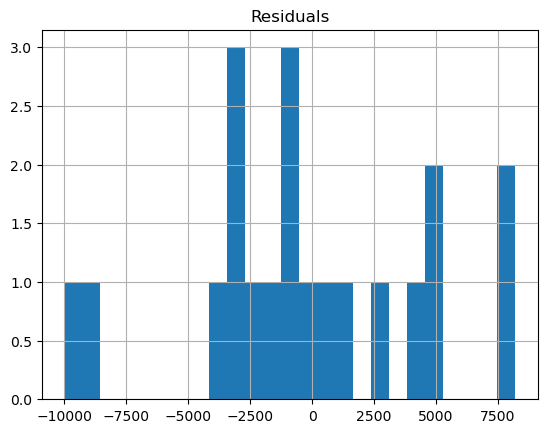

In [62]:
# Identify validation residuals of the regression model
# to check if they have approximately normal distribution.
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

# Develop data frame for the histogram using hist()
# function.
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)

# Show histogram plot. 
# plt.tight_layout()
plt.show()

## Use statsmodels library to develop linear regression models.

In [82]:
# Apply sm.ols() function from statsmodels library
# to run a linear regression of Price on the 
# 11 predictors (including 2 dummy variables)
# in the training set.

# Create a data frame that inlcudes 16 predictors and
# outcome (Price) for training set.
train_df_sm = train_X.join(train_y)

# Display columns in train_df data frame.
train_df_sm.columns

Index(['year', 'mileage', 'colour_Blue', 'colour_Pearl', 'colour_Red',
       'colour_Silver', 'car_type_Model_S', 'car_type_Model_X',
       'car_type_Model_Y', 'wheels_19', 'wheels_20', 'wheels_21', 'wheels_22',
       'Interior_Type_Premium', 'Interior_Type_Textile', 'price'],
      dtype='object')

In [64]:
# Create predictors for the model.
predictors_sm = train_X.columns

# Develop regression model formula, where
# Price is outcome and 11 predictors. 
formula = 'train_y ~ ' + ' + '.join(predictors_sm)

# Create multiple regression model using sm.ols()
# function from statsmodels library.
car_lm_sm = sm.ols(formula=formula, data=train_df_sm).fit()

# Display regression summary.
print(car_lm_sm.summary()) 

# The regression coefficients are the same as for the 
# regression model using LinearRegression() function 
# from scikit-learn library.

                            OLS Regression Results                            
Dep. Variable:                train_y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     26.09
Date:                Fri, 24 Mar 2023   Prob (F-statistic):           5.46e-08
Time:                        00:05:35   Log-Likelihood:                -284.96
No. Observations:                  30   AIC:                             599.9
Df Residuals:                      15   BIC:                             620.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -1.078e+

In [65]:
# Apply predict() function to score predictions  
# for validation set.  
car_lm_pred_sm = car_lm_sm.predict(valid_X)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 

result = round(pd.DataFrame({'Actual': valid_y,'Predicted': car_lm_pred_sm, 
                       'Residual': valid_y - car_lm_pred_sm}), 2)
print('Actual, Prediction, and Residual Price for Validation Set')
print(result.head(10))
print()

# Display common accuracy measures for validation set.
print('Accuracy Measures for Validation Set')
regressionSummary(valid_y, car_lm_pred_sm)

Actual, Prediction, and Residual Price for Validation Set
    Actual  Predicted  Residual
27   67600   71711.79  -4111.79
35   34000   37433.46  -3433.46
40   35300   37071.77  -1771.77
38   34500   33964.83    535.17
2    59800   55048.14   4751.86
3    62100   62720.30   -620.30
48   36500   37382.07   -882.07
29   31300   23095.84   8204.16
46   36100   45290.37  -9190.37
31   31500   28773.55   2726.45

Accuracy Measures for Validation Set

Regression statistics

                      Mean Error (ME) : -247.4021
       Root Mean Squared Error (RMSE) : 4736.0061
            Mean Absolute Error (MAE) : 3739.9488
          Mean Percentage Error (MPE) : -0.8459
Mean Absolute Percentage Error (MAPE) : 9.3705


## Exhaustive Search algorithm.

In [66]:
# Define train_model() function used in Executive Search
# algorithm with executive_search() function. 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Executive Search
# algorithm with executive_search() function. 
def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # Apply negative sign as score is optimized to be 
    # as low as possible in exhaustive_search() function.
    return -adjusted_r2_score(train_y, pred_y, model)

# Create allVariables object with predcitors in train_X,
# i.e., training data set, with 11 predictor columns and 
# 600 records.
allVariables = train_X.columns

# The exhaustive_search() function consists of 3 arguments:
# - allVariables - list of all variables in training data set,
# - train_model() function that creates a model for a specific 
#    combination of variables,
# - score_model() function that score the model performance using
#     adjusted_r2.
results = exhaustive_search(allVariables, train_model, score_model)

# Create data[] loop process to identify and append the best model 
# for each combination of 1, 2, 3, ..., 11 variables with their 
# respective number of variables (n), adjusted R_squared (r2adj) and
# AIC. 
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

# Define the width of output presentation to be wider
# to display results in two rows (instead of more rows
# otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))

# Reset the output width to the default. 
pd.reset_option('display.width')

     n     r2adj         AIC  Interior_Type_Premium  Interior_Type_Textile  car_type_Model_S  \
0    1  0.503222  650.852043                  False                  False              True   
1    2  0.673976  639.125828                  False                  False              True   
2    3  0.818082  622.491196                  False                  False              True   
3    4  0.874165  612.257072                  False                  False              True   
4    5  0.900014  606.134036                  False                  False              True   
5    6  0.922379  599.261771                   True                  False              True   
6    7  0.936182  594.053962                   True                   True              True   
7    8  0.938763  593.419738                   True                  False              True   
8    9  0.940413  593.136660                   True                   True              True   
9   10  0.938072  594.753911            

In [67]:
# Develop the multiple linear regression model based
# on the Exhaustive Search results.

# Identify predictors and outcome of the regression model.
predictors_ex = [  
                'year',
                'mileage',
                'colour_Blue',
                'colour_Pearl',
                'colour_Red',
                'colour_Silver',
                'car_type_Model_S',
                'car_type_Model_X',
                'car_type_Model_Y',
                #'Interior_Color_Black-White',
                #'Interior_Color_Cream',
                'wheels_19',            
                'wheels_20',               
                'wheels_21',              
                'wheels_22',              
                'Interior_Type_Premium',
                'Interior_Type_Textile' ] 

outcome = 'price'


# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors_ex]
y = car_df_reg[outcome]
train_X_ex, valid_X_ex, train_y_ex, valid_y_ex = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
car_ex = LinearRegression()
car_ex.fit(train_X_ex, train_y_ex)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Exhaustive Search')
print()
print('Intercept ', np.round(car_ex.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(car_ex.coef_, 2)}))


Regression Model for Training Set Using Exhaustive Search

Intercept  -10777830.64
                Predictor  Coefficient
0                    year      5355.91
1                 mileage        -0.21
2             colour_Blue      5564.77
3            colour_Pearl      1913.88
4              colour_Red      4596.87
5           colour_Silver       768.06
6        car_type_Model_S     14518.56
7        car_type_Model_X     22356.93
8        car_type_Model_Y     -9262.19
9               wheels_19      6112.23
10              wheels_20      1469.30
11              wheels_21     14330.52
12              wheels_22      5701.25
13  Interior_Type_Premium     10822.96
14  Interior_Type_Textile      9497.72


In [69]:
# Use predict() function to score (make) predictions 
# for validation set and measure their accuracy using
# Exhaustive Search algorithm.
car_ex_pred = car_ex.predict(valid_X_ex)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_ex,'Predicted': car_ex_pred, 
                       'Residual': valid_y_ex - car_ex_pred}), 2)
print()
print('Prediction for Validation Set Using Exhaustive Search') 
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Exhaustive Search')
regressionSummary(valid_y_ex, car_ex_pred)


Prediction for Validation Set Using Exhaustive Search
    Actual  Predicted  Residual
27   67600   71711.79  -4111.79
35   34000   37433.46  -3433.46
40   35300   37071.77  -1771.77
38   34500   33964.83    535.17
2    59800   55048.14   4751.86
3    62100   62720.30   -620.30
48   36500   37382.07   -882.07
29   31300   23095.84   8204.16
46   36100   45290.37  -9190.37
31   31500   28773.55   2726.45

Accuracy Measures for Validation Set Using Exhaustive Search

Regression statistics

                      Mean Error (ME) : -247.4021
       Root Mean Squared Error (RMSE) : 4736.0061
            Mean Absolute Error (MAE) : 3739.9488
          Mean Percentage Error (MPE) : -0.8459
Mean Absolute Percentage Error (MAPE) : 9.3705


## Backward Elimination algorithm.

In [70]:
# Define train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Display best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: year, mileage, colour_Blue, colour_Pearl, colour_Red, colour_Silver, car_type_Model_S, car_type_Model_X, car_type_Model_Y, wheels_19, wheels_20, wheels_21, wheels_22, Interior_Type_Premium, Interior_Type_Textile
Start: score=603.91
Step: score=601.91, remove wheels_22
Step: score=599.92, remove wheels_19
Step: score=597.98, remove colour_Silver
Step: score=596.17, remove car_type_Model_Y
Step: score=594.75, remove colour_Pearl
Step: score=593.14, remove colour_Red
Step: score=593.14, remove None

Best Variables from Backward Elimination Algorithm
['year', 'mileage', 'colour_Blue', 'car_type_Model_S', 'car_type_Model_X', 'wheels_20', 'wheels_21', 'Interior_Type_Premium', 'Interior_Type_Textile']


In [72]:
# Develop the multiple linear regression model based
# on the Backward Elimination results.

# Identify predictors and outcome of the regression model.
predictors_be = [ 
                'year',
                'mileage',
                'colour_Blue',
                'colour_Pearl',
                'colour_Red',
                'colour_Silver',
                'car_type_Model_S',
                'car_type_Model_X',
                'car_type_Model_Y',
                #'Interior_Color_Black-White',
                #'Interior_Color_Cream',
                'wheels_19',            
                'wheels_20',               
                'wheels_21',              
                'wheels_22',              
                'Interior_Type_Premium',
                'Interior_Type_Textile'  
]

outcome = 'price'
# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors_be]
y = car_df_reg[outcome]
train_X_be, valid_X_be, train_y_be, valid_y_be = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
car_be = LinearRegression()
car_be.fit(train_X_be, train_y_be)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Backward Elimination')
print()
print('Intercept ', np.round(car_be.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(car_be.coef_, 2)}))


Regression Model for Training Set Using Backward Elimination

Intercept  -10777830.64
                Predictor  Coefficient
0                    year      5355.91
1                 mileage        -0.21
2             colour_Blue      5564.77
3            colour_Pearl      1913.88
4              colour_Red      4596.87
5           colour_Silver       768.06
6        car_type_Model_S     14518.56
7        car_type_Model_X     22356.93
8        car_type_Model_Y     -9262.19
9               wheels_19      6112.23
10              wheels_20      1469.30
11              wheels_21     14330.52
12              wheels_22      5701.25
13  Interior_Type_Premium     10822.96
14  Interior_Type_Textile      9497.72


In [73]:
# Use predict() to score predictions for validation set in
# regression model based Backward Elimination algorithm.
car_be_pred = car_be.predict(valid_X_be)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_be,'Predicted': car_be_pred, 
                       'Residual': valid_y_be - car_be_pred}), 2)
print()
print('Predictions for Validation Set Using Backward Elimination')
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Backward Elimination')
regressionSummary(valid_y_be, car_be_pred)


Predictions for Validation Set Using Backward Elimination
    Actual  Predicted  Residual
27   67600   71711.79  -4111.79
35   34000   37433.46  -3433.46
40   35300   37071.77  -1771.77
38   34500   33964.83    535.17
2    59800   55048.14   4751.86
3    62100   62720.30   -620.30
48   36500   37382.07   -882.07
29   31300   23095.84   8204.16
46   36100   45290.37  -9190.37
31   31500   28773.55   2726.45

Accuracy Measures for Validation Set Using Backward Elimination

Regression statistics

                      Mean Error (ME) : -247.4021
       Root Mean Squared Error (RMSE) : 4736.0061
            Mean Absolute Error (MAE) : 3739.9488
          Mean Percentage Error (MPE) : -0.8459
Mean Absolute Percentage Error (MAPE) : 9.3705


##  Forward Selection algorithm.

In [77]:
# Define train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
# The initial model is the constant model - this requires 
# special handling in train_model and score_model.
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Use forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Display best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: year, mileage, colour_Blue, colour_Pearl, colour_Red, colour_Silver, car_type_Model_S, car_type_Model_X, car_type_Model_Y, wheels_19, wheels_20, wheels_21, wheels_22, Interior_Type_Premium, Interior_Type_Textile
Start: score=670.89, constant
Step: score=650.85, add car_type_Model_S
Step: score=639.13, add car_type_Model_X
Step: score=622.49, add car_type_Model_Y
Step: score=612.26, add mileage
Step: score=606.13, add wheels_21
Step: score=602.74, add year
Step: score=598.77, add Interior_Type_Premium
Step: score=595.23, add Interior_Type_Textile
Step: score=595.23, add None

Best Variables from Forward Selection Algorithm
['car_type_Model_S', 'car_type_Model_X', 'car_type_Model_Y', 'mileage', 'wheels_21', 'year', 'Interior_Type_Premium', 'Interior_Type_Textile']


In [79]:
# Develop the multiple linear regression model based
# on the Forward Selection results.

# Identify predictors and outcome of the regression model.
predictors_fs = ['year',
                'mileage',
                'colour_Blue',
                'colour_Pearl',
                'colour_Red',
                'colour_Silver',
                'car_type_Model_S',
                'car_type_Model_X',
                'car_type_Model_Y',
                #'Interior_Color_Black-White',
                #'Interior_Color_Cream',
                'wheels_19',            
                'wheels_20',               
                'wheels_21',              
                'wheels_22',              
                'Interior_Type_Premium',
                'Interior_Type_Textile' ]

outcome = 'price'

# Identify X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = car_df_reg[predictors_fs]
y = car_df_reg[outcome]
train_X_fs, valid_X_fs, train_y_fs, valid_y_fs = \
          train_test_split(X, y, test_size=0.4, random_state=1)

# Create multiple linear regression model using X and y.
car_fs = LinearRegression()
car_fs.fit(train_X_fs, train_y_fs)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Regression Model for Training Set Using Forward Selection')
print()
print('Intercept ', np.round(car_fs.intercept_, 2))
print(pd.DataFrame({'Predictor': X.columns,
            'Coefficient': np.round(car_fs.coef_, 2)}))

Regression Model for Training Set Using Forward Selection

Intercept  -10777830.64
                Predictor  Coefficient
0                    year      5355.91
1                 mileage        -0.21
2             colour_Blue      5564.77
3            colour_Pearl      1913.88
4              colour_Red      4596.87
5           colour_Silver       768.06
6        car_type_Model_S     14518.56
7        car_type_Model_X     22356.93
8        car_type_Model_Y     -9262.19
9               wheels_19      6112.23
10              wheels_20      1469.30
11              wheels_21     14330.52
12              wheels_22      5701.25
13  Interior_Type_Premium     10822.96
14  Interior_Type_Textile      9497.72


In [80]:
# Use predict() to score predictions for validation set.
car_fs_pred = car_fs.predict(valid_X_fs)

# Develop and display data frame with actual values of Price,
# scoring (predicted) results, and residuals.
# Use round() function to round vlaues in data frame to 
# 2 decimals. 
result = round(pd.DataFrame({'Actual': valid_y_fs,'Predicted': car_fs_pred, 
                       'Residual': valid_y_fs - car_fs_pred}), 2)
print()
print('Predictions for Validation Set Using Forward Selection')
print(result.head(10))

# Display common accuracy measures for validation set.
print()
print('Accuracy Measures for Validation Set Using Forward Selection')
regressionSummary(valid_y_fs, car_fs_pred)


Predictions for Validation Set Using Forward Selection
    Actual  Predicted  Residual
27   67600   71711.79  -4111.79
35   34000   37433.46  -3433.46
40   35300   37071.77  -1771.77
38   34500   33964.83    535.17
2    59800   55048.14   4751.86
3    62100   62720.30   -620.30
48   36500   37382.07   -882.07
29   31300   23095.84   8204.16
46   36100   45290.37  -9190.37
31   31500   28773.55   2726.45

Accuracy Measures for Validation Set Using Forward Selection

Regression statistics

                      Mean Error (ME) : -247.4021
       Root Mean Squared Error (RMSE) : 4736.0061
            Mean Absolute Error (MAE) : 3739.9488
          Mean Percentage Error (MPE) : -0.8459
Mean Absolute Percentage Error (MAPE) : 9.3705
